<a href="https://colab.research.google.com/github/veydantkatyal/network-intrusion-detection-system-nus/blob/main/network_intrusion_detection_explainable_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data1=pd.read_csv('/content/drive/MyDrive/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
data2=pd.read_csv('/content/drive/MyDrive/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
data7=pd.read_csv('/content/drive/MyDrive/Wednesday-workingHours.pcap_ISCX.csv')
datalist=[data1, data2, data7]
rows1, cols1=data1.shape
rows2, cols2=data2.shape
print(f'portscan: {rows1} rows, {cols1} cols')
print(f'DDoS: {rows2} rows, {cols2} cols')

data=pd.concat(datalist)
rows, cols=data.shape
print('\nFinal dataset-')
print(f'rows: {rows}')
print(f'cols: {cols}')

Mounted at /content/drive
portscan: 286467 rows, 79 cols
DDoS: 225745 rows, 79 cols

Final dataset-
rows: 1204915
cols: 79


In [ ]:
data[' Label'].unique()

array(['BENIGN', 'PortScan', 'DDoS', 'DoS slowloris', 'DoS Slowhttptest',
       'DoS Hulk', 'DoS GoldenEye', 'Heartbleed'], dtype=object)

In [ ]:
map={'BENIGN':'BENIGN', 'PortScan':'PORTSCAN', 'DoS slowloris':'DoS', 'DoS Slowhttptest':'DoS', 'DoS Hulk':'DoS', 'DoS GoldenEye':'DoS', 'Heartbleed':'DoS', 'DDoS':'DDoS'}
data[' Label']=data[' Label'].map(map)
data[' Label'].unique()

array(['BENIGN', 'PORTSCAN', 'DDoS', 'DoS'], dtype=object)


Class Distribution:
 Label
BENIGN      665286
DoS         252672
PORTSCAN    158930
DDoS        128027
Name: count, dtype: int64


<ipython-input-5-bb2fca94d8d5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=' Label', data=data, palette='Set2')


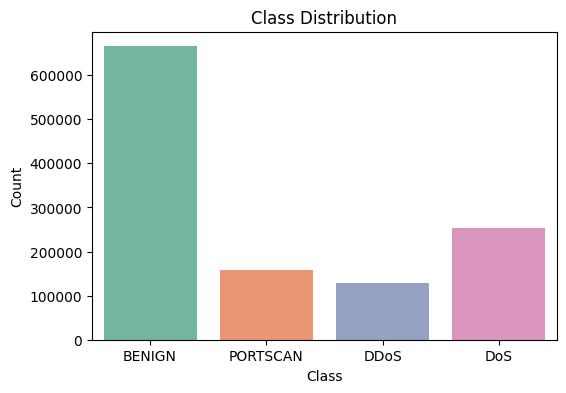

In [ ]:
# Class Distribution
print("\nClass Distribution:")
print(data[' Label'].value_counts())

# Plot Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=' Label', data=data, palette='Set2')
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [ ]:
data=data.dropna()
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)
duplicate=data.duplicated().sum()
print("duplicates: ", duplicate)
data.drop_duplicates(inplace=True)

duplicates:  163926


In [ ]:
benign=data[data[' Label']=='BENIGN']
portscan=data[data[' Label']=='PORTSCAN']
ddos=data[data[' Label']=='DDoS']
dos=data[data[' Label']=='DoS']
newbenign=resample(benign, replace=False, n_samples=len(ddos), random_state=42)
# Change replace to True to allow sampling with replacement
newportscan=resample(portscan, replace=True, n_samples=len(ddos), random_state=42)
newdos=resample(dos, replace=False, n_samples=len(ddos), random_state=42)
data=pd.concat([newbenign, newportscan, newdos, ddos])
data=data.sample(frac=1, random_state=42)
data[' Label'].value_counts()

,count
Label,
DoS,128014
PORTSCAN,128014
DDoS,128014
BENIGN,128014


In [ ]:
#data=balanced_data
duplicate=data.duplicated().sum()
print("duplicates: ", duplicate)
data.drop_duplicates(inplace=True)
print("\ndata after cleaning: ")
print("null values: ", data.isna().sum().sum())
print("duplicates: ",data.duplicated().sum())
print('\n',data.shape)

duplicates:  59385

data after cleaning: 
null values:  0
duplicates:  0

 (452671, 79)


In [ ]:
data.isna().sum().sum()

0

In [ ]:
data[' Label'].value_counts()

,count
Label,
DoS,128014
DDoS,128014
BENIGN,128014
PORTSCAN,68629


In [ ]:
from sklearn.model_selection import train_test_split

# Target total dataset size
total_samples = 20000  # Adjust to 17000 or 20000 as needed

# Determine the proportion of each label
target_samples_per_label = total_samples // 4

# Filter only the required labels
data_filtered = data[data[' Label'].isin(['BENIGN', 'DDoS', 'DoS', 'PORTSCAN'])]

# Split the data using stratified sampling
data, _ = train_test_split(
    data_filtered,
    train_size=total_samples,
    stratify=data_filtered[' Label'],  # Ensures equal distribution of labels
    random_state=42
)

# Check the size and label distribution of the final dataset
print("Final dataset size:", len(data))
print(data[' Label'].value_counts())

Final dataset size: 20000
 Label
DDoS        5656
DoS         5656
BENIGN      5656
PORTSCAN    3032
Name: count, dtype: int64


In [ ]:
label_encoder=preprocessing.LabelEncoder()
data[' Label']=label_encoder.fit_transform(data[' Label'])
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)

{'BENIGN': 0, 'DDoS': 1, 'DoS': 2, 'PORTSCAN': 3}


In [ ]:
# Example: Assume `data` is your DataFrame
# Separate the label column
categorical_columns = [' Label']  # Replace with the actual names of categorical columns
numerical_columns = [col for col in data.columns if col not in categorical_columns]

# Separate numerical and categorical data
numerical_data = data[numerical_columns]
categorical_data = data[categorical_columns]

# Apply StandardScaler to the numerical data
scaler = StandardScaler()
scaled_numerical_data = scaler.fit_transform(numerical_data)

# Convert scaled numerical data back to a DataFrame
scaled_numerical_df = pd.DataFrame(scaled_numerical_data, columns=numerical_columns, index=data.index)

# Recombine numerical and categorical data
data = pd.concat([scaled_numerical_df, categorical_data], axis=1)

In [ ]:
data.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
104543,-0.101649,-0.696775,-0.107839,-0.059674,-0.170366,-0.062772,-0.275194,-0.119903,-0.257881,-0.258209,...,-0.199803,-0.179987,-0.079451,-0.177268,-0.166569,-0.638938,-0.193477,-0.653439,-0.607843,3
105733,-0.325031,1.217464,0.069280,0.002777,-0.145894,0.041736,-0.250463,-0.152551,-0.232353,-0.239359,...,-0.776351,6.287089,-0.079451,4.824370,6.657193,1.277283,-0.193477,1.210156,1.311426,1
124666,-0.325031,1.299035,0.069280,-0.012836,-0.034408,0.041682,0.137000,-0.152551,-0.075358,0.097578,...,0.953294,-0.178655,-0.079451,-0.176238,-0.165164,1.506817,-0.193477,1.433386,1.541324,2
118790,-0.325031,-0.696300,-0.082536,-0.044061,-0.165834,-0.062727,-0.269698,-0.054608,-0.237459,-0.258209,...,-0.776351,-0.179987,-0.079451,-0.177268,-0.166569,-0.638938,-0.193477,-0.653439,-0.607843,2
285742,-0.325031,1.331780,0.043977,0.018389,-0.017186,0.041682,0.189211,-0.152551,-0.020109,0.170002,...,0.953294,-0.178649,-0.079451,-0.176234,-0.165158,1.563555,-0.193477,1.488566,1.598153,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 104543 to 282699
Data columns (total 79 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0    Destination Port             20000 non-null  float64
 1    Flow Duration                20000 non-null  float64
 2    Total Fwd Packets            20000 non-null  float64
 3    Total Backward Packets       20000 non-null  float64
 4   Total Length of Fwd Packets   20000 non-null  float64
 5    Total Length of Bwd Packets  20000 non-null  float64
 6    Fwd Packet Length Max        20000 non-null  float64
 7    Fwd Packet Length Min        20000 non-null  float64
 8    Fwd Packet Length Mean       20000 non-null  float64
 9    Fwd Packet Length Std        20000 non-null  float64
 10  Bwd Packet Length Max         20000 non-null  float64
 11   Bwd Packet Length Min        20000 non-null  float64
 12   Bwd Packet Length Mean       20000 non-null  float64
 13  

In [ ]:
data.to_csv('data.csv', index=False)
print("\nCleaned dataset saved as 'data.csv'")


Cleaned dataset saved as 'data.csv'


In [ ]:
# Dataset Information
print("Dataset Information:")
print(data.info())

# First Few Rows
print("\nFirst Few Rows:")
print(data.head())

# Dataset Shape
print(f"\nDataset Shape: {data.shape}")

# Unique Value Count
print("\nUnique Value Count Per Column:")
print(data.nunique())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 104543 to 282699
Data columns (total 79 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0    Destination Port             20000 non-null  float64
 1    Flow Duration                20000 non-null  float64
 2    Total Fwd Packets            20000 non-null  float64
 3    Total Backward Packets       20000 non-null  float64
 4   Total Length of Fwd Packets   20000 non-null  float64
 5    Total Length of Bwd Packets  20000 non-null  float64
 6    Fwd Packet Length Max        20000 non-null  float64
 7    Fwd Packet Length Min        20000 non-null  float64
 8    Fwd Packet Length Mean       20000 non-null  float64
 9    Fwd Packet Length Std        20000 non-null  float64
 10  Bwd Packet Length Max         20000 non-null  float64
 11   Bwd Packet Length Min        20000 non-null  float64
 12   Bwd Packet Length Mean       20000 no


Class Distribution:
 Label
1    5656
2    5656
0    5656
3    3032
Name: count, dtype: int64


<ipython-input-19-bb2fca94d8d5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=' Label', data=data, palette='Set2')


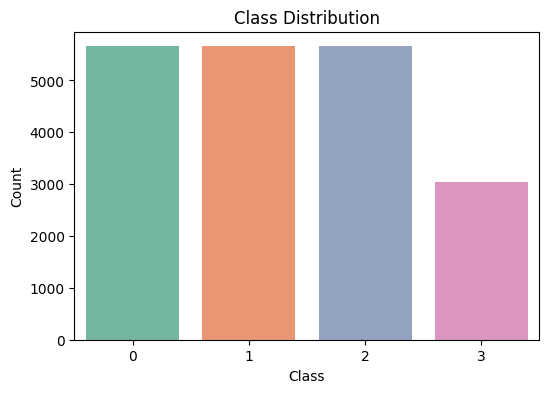

In [ ]:
# Class Distribution
print("\nClass Distribution:")
print(data[' Label'].value_counts())

# Plot Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=' Label', data=data, palette='Set2')
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


In [ ]:
print("\nSummary Statistics for Numerical Columns:")
print(data.describe())


Summary Statistics for Numerical Columns:
        Destination Port   Flow Duration   Total Fwd Packets  \
count       2.000000e+04    2.000000e+04        2.000000e+04   
mean        1.492140e-17    6.927792e-17        9.237056e-18   
std         1.000025e+00    1.000025e+00        1.000025e+00   
min        -3.311406e-01   -6.967757e-01       -1.078389e-01   
25%        -3.250310e-01   -6.967448e-01       -8.253616e-02   
50%        -3.250310e-01   -6.689529e-01       -5.723345e-02   
75%        -2.973086e-01    1.270894e+00        1.867466e-02   
max         4.666897e+00    2.149117e+00        1.347556e+02   

        Total Backward Packets  Total Length of Fwd Packets  \
count             2.000000e+04                 2.000000e+04   
mean              4.973799e-18                 3.552714e-18   
std               1.000025e+00                 1.000025e+00   
min              -7.528658e-02                -1.712725e-01   
25%              -5.967393e-02                -1.658341e-01   
50


Missing Values Per Column:
 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64


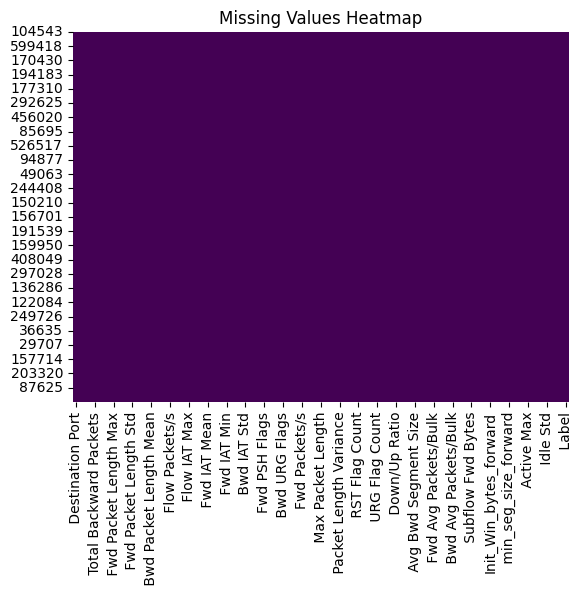

In [ ]:
# Missing Values
print("\nMissing Values Per Column:")
print(data.isnull().sum())

# Visualize Missing Values
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


Correlation Matrix:


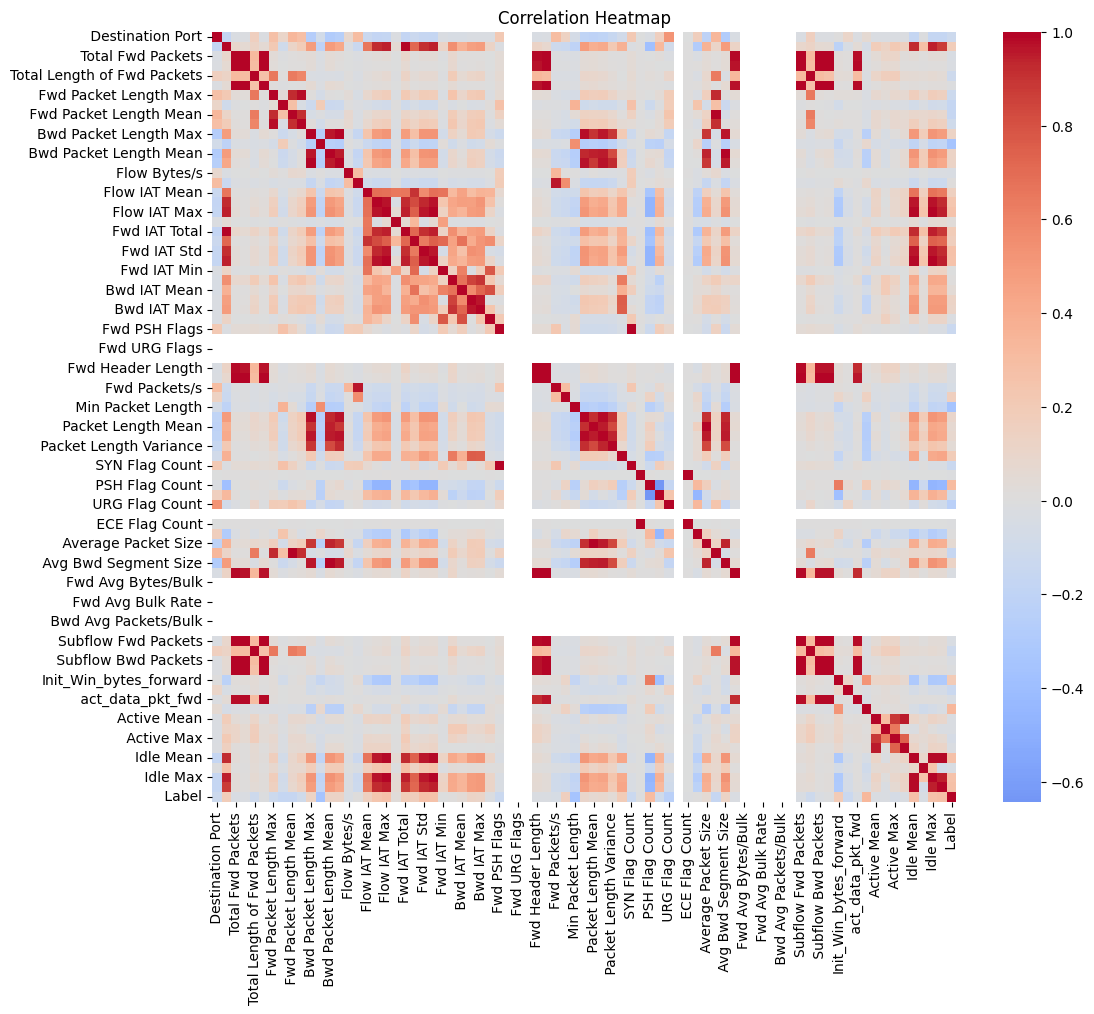

In [ ]:
print("\nCorrelation Matrix:")
corr_matrix = data.select_dtypes(include=['number']).corr()  # Include only numerical features

# Visualize the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
corr = data.corr(numeric_only = True).round(2)
corr.style.background_gradient(cmap = 'coolwarm', axis = None).format(precision = 2)

pos_corr_features = corr[' Label'][(corr[' Label'] > 0.2) & (corr[' Label'] < 1)].index.tolist()

print("Features with positive correlation with 'Label':\n")
for i, feature in enumerate(pos_corr_features, start = 1):
    corr_value = corr.loc[feature, ' Label']
    print('{:<3} {:<24} :{}'.format(f'{i}.', feature, corr_value))



Features with positive correlation with 'Label':

1.   Flow IAT Std            :0.24
2.   Flow IAT Max            :0.26
3.   Fwd IAT Std             :0.26
4.   Fwd IAT Max             :0.26
5.   PSH Flag Count          :0.31
6.   min_seg_size_forward    :0.33
7.  Idle Mean                :0.27
8.   Idle Max                :0.26
9.   Idle Min                :0.28


Feature Selection through Explainable AI- Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier(max_depth=16, random_state=8)
tempdata=data
X=tempdata.drop([' Label'], axis=1)
y=tempdata[' Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
# Get feature importances
importances = clf.feature_importances_

# Select features with importance greater than a threshold
threshold = 0.1  # Adjust as needed
selected_features = X.columns[importances > threshold]

# Use only the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


In [ ]:
# Train a new model using the selected features
clf_selected = DecisionTreeClassifier(max_depth=16, random_state=8)
clf_selected.fit(X_train_selected, y_train)

DecisionTreeClassifier(max_depth=16, random_state=8)

In [ ]:
# Make predictions on the test set using the model trained with all features
y_pred_all_features = clf.predict(X_test)

# Calculate the accuracy of the model with all features
accuracy_all_features = accuracy_score(y_test, y_pred_all_features)
print(f"Accuracy with all features: {accuracy_all_features}")

# Make predictions on the test set using the model trained with selected features
y_pred_selected_features = clf_selected.predict(X_test_selected)

# Calculate the accuracy of the model with selected features
accuracy_selected_features = accuracy_score(y_test, y_pred_selected_features)
print(f"Accuracy with selected features: {accuracy_selected_features}")
y_pred_selected_features = clf_selected.predict(X_test_selected)

Accuracy with all features: 0.9971666666666666
Accuracy with selected features: 0.9876666666666667


In [ ]:
data = pd.concat([X[selected_features], data[' Label']], axis=1)
data.head()

,Fwd Packet Length Max,PSH Flag Count,Init_Win_bytes_backward,act_data_pkt_fwd,Label
104543,-0.275194,1.250115,-0.155641,-0.068566,3
105733,-0.250463,-0.799926,-0.113125,0.087526,1
124666,0.137000,-0.799926,-0.112011,-0.042551,2
118790,-0.269698,-0.799926,-0.112011,-0.042551,2
285742,0.189211,-0.799926,-0.112011,-0.042551,2



Visualizing Outliers Before Handling:


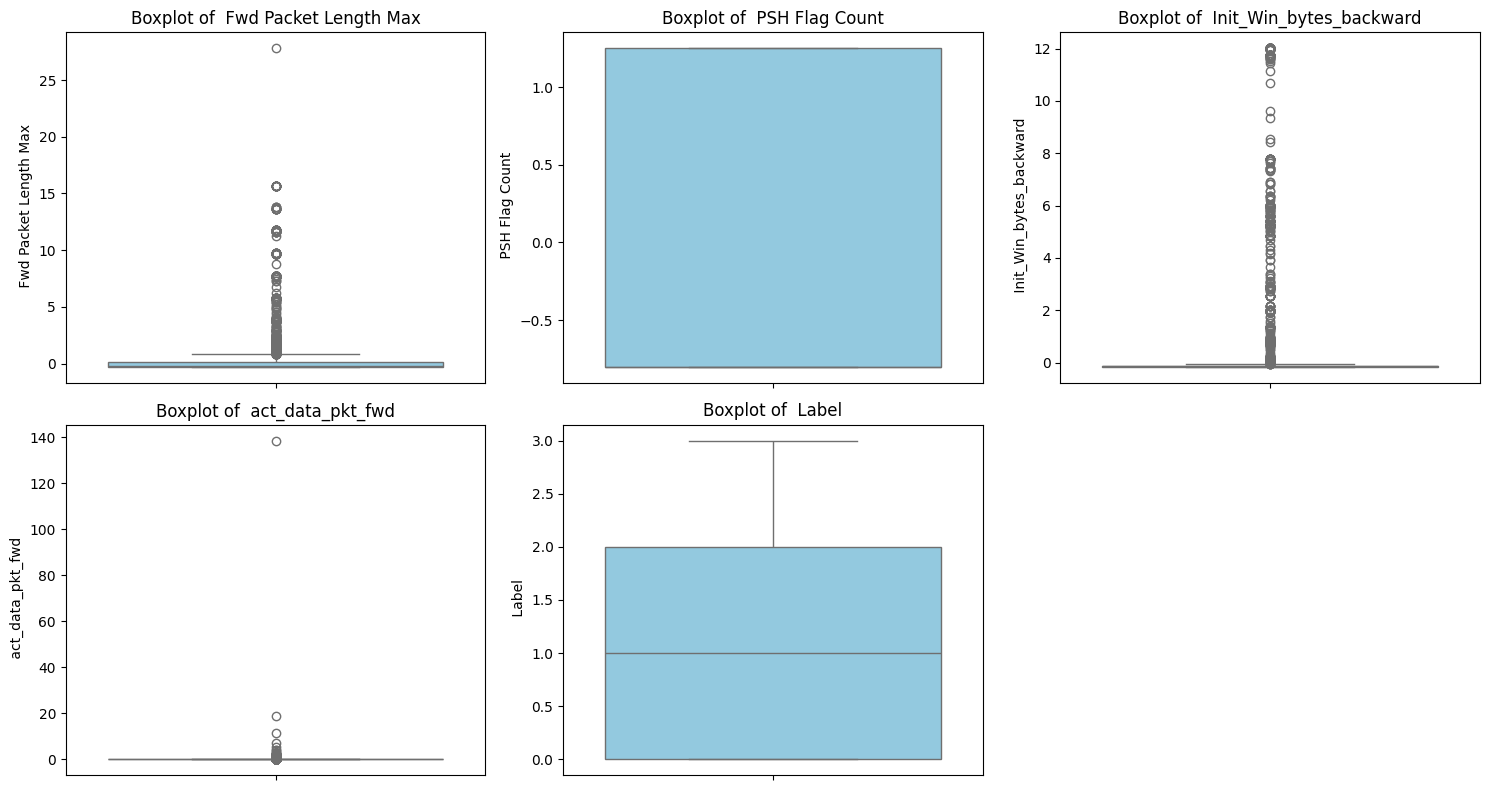


 Fwd Packet Length Max Summary:
Lower Bound: -0.9168423792477051, Upper Bound: 0.8088753760114673
Outliers Below Lower Bound: 0
Outliers Above Upper Bound: 481

 PSH Flag Count Summary:
Lower Bound: -3.8749884850053515, Upper Bound: 4.325177603250603
Outliers Below Lower Bound: 0
Outliers Above Upper Bound: 0

 Init_Win_bytes_backward Summary:
Lower Bound: -0.22154951703366382, Upper Bound: -0.04628824668536434
Outliers Below Lower Bound: 0
Outliers Above Upper Bound: 737

 act_data_pkt_fwd Summary:
Lower Bound: -0.18563431945487197, Upper Bound: 0.12654851498910802
Outliers Below Lower Bound: 0
Outliers Above Upper Bound: 575

 Label Summary:
Lower Bound: -3.0, Upper Bound: 5.0
Outliers Below Lower Bound: 0
Outliers Above Upper Bound: 0

Total Outliers Detected and Removed Across All Columns: 1793


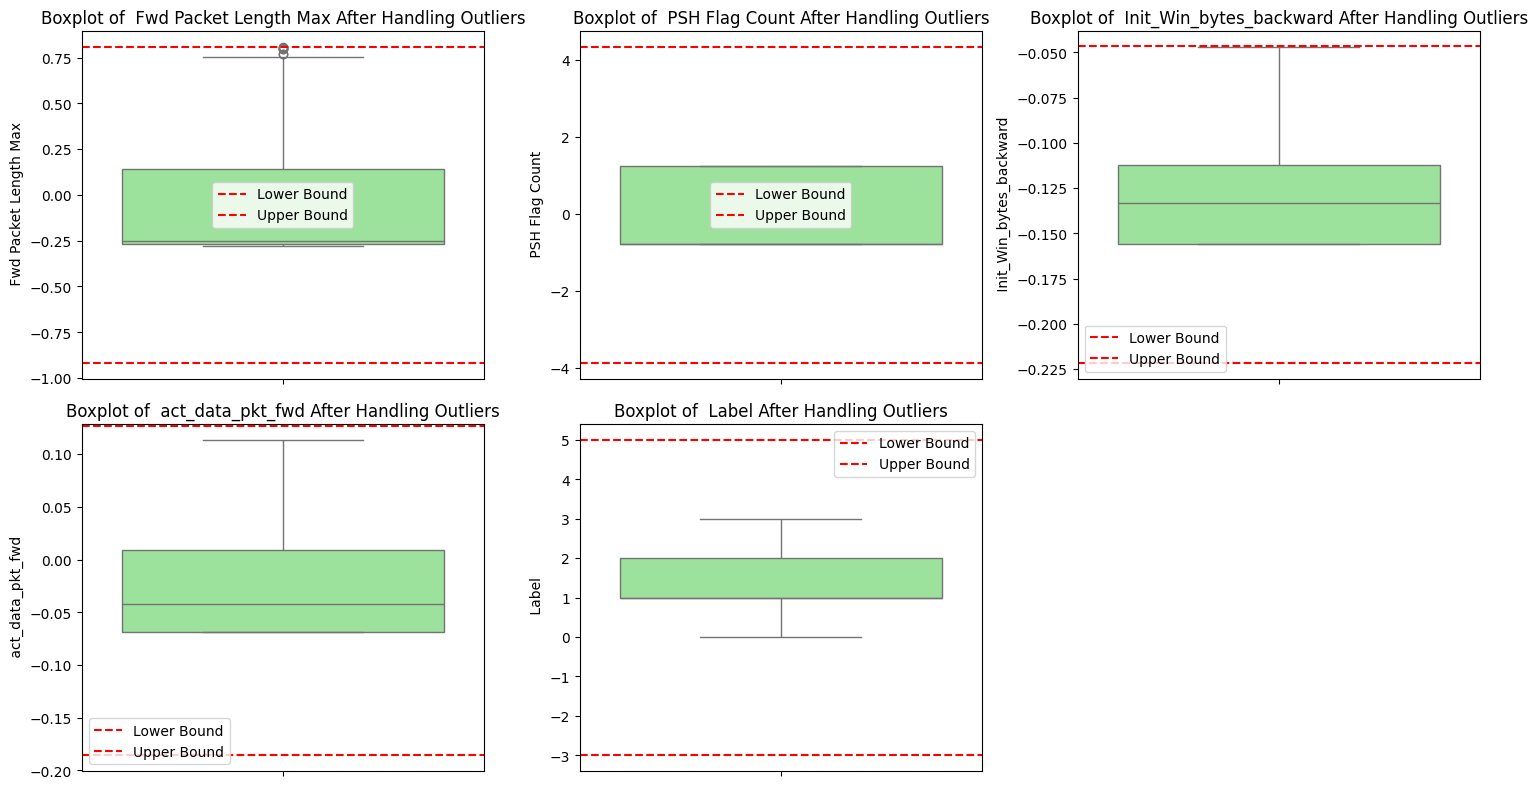

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Identify numeric columns
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Store original statistics for all columns
original_stats = {}

for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    mean = data[col].mean()
    std_dev = data[col].std()
    original_stats[col] = {
        'Q1': Q1, 'Q3': Q3, 'IQR': IQR, 'mean': mean, 'std_dev': std_dev,
        'lower_bound': Q1 - 1.5 * IQR, 'upper_bound': Q3 + 1.5 * IQR
    }

# Visualize boxplots before handling outliers
print("\nVisualizing Outliers Before Handling:")
rows, cols = (len(numeric_cols) + 2) // 3, 3
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))

for ax, col in zip(axes.flatten(), numeric_cols):
    sns.boxplot(y=data[col], ax=ax, color='skyblue')
    ax.set_title(f"Boxplot of {col}")
    ax.set_ylabel(col)

# Remove unused subplots
for i in range(len(numeric_cols), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

# Outlier Removal Function with Fixed Bounds
def remove_outliers_fixed_bounds(df, numeric_cols):
    total_outliers = 0
    bounds = {}  # Store bounds for each column

    # Calculate bounds only once
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        bounds[col] = (lower_bound, upper_bound)

    # Initialize mask to keep all rows initially
    mask = np.ones(len(df), dtype=bool)

    for col in numeric_cols:
        lower_bound, upper_bound = bounds[col]

        # Detect outliers using fixed bounds
        outliers_below = (df[col] < lower_bound).sum()
        outliers_above = (df[col] > upper_bound).sum()
        total_outliers += outliers_below + outliers_above

        # Print outlier details
        print(f"\n{col} Summary:")
        print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
        print(f"Outliers Below Lower Bound: {outliers_below}")
        print(f"Outliers Above Upper Bound: {outliers_above}")

        # Update the mask to exclude rows where the outlier condition is met
        mask &= (df[col] >= lower_bound) & (df[col] <= upper_bound)

    # Apply the mask to filter out outliers
    df = df[mask]

    print(f"\nTotal Outliers Detected and Removed Across All Columns: {total_outliers}")
    return df, bounds, total_outliers  # Return bounds


# Apply outlier removal using fixed bounds and get the bounds
data, bounds, total_outliers_removed = remove_outliers_fixed_bounds(data, numeric_cols)

# Visualize Boxplots After Handling Outliers (Using Initial Bounds)
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))

for ax, col in zip(axes.flatten(), numeric_cols):
    lower_bound, upper_bound = bounds[col] # Access bounds here
    sns.boxplot(y=data[col], ax=ax, color='lightgreen') # Use data instead of data_cleaned
    ax.axhline(lower_bound, color='red', linestyle='--', label='Lower Bound')
    ax.axhline(upper_bound, color='red', linestyle='--', label='Upper Bound')
    ax.set_title(f"Boxplot of {col} After Handling Outliers")
    ax.set_ylabel(col)
    ax.legend()

# Remove unused subplots
for i in range(len(numeric_cols), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

In [ ]:
data.shape
data.to_csv('final_features.csv', index=False)

# ML MODELS

In [ ]:
# Data Manipulation
import pandas as pd
import numpy as np

# Model Building
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Model Evaluation
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    ConfusionMatrixDisplay,
    roc_auc_score,
    RocCurveDisplay
)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Miscellaneous
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
selected_features=pos_corr_features
'''
X=data[selected_features]
y=data[' Label']
'''
X=data.drop([' Label'], axis=1)
y=data[' Label']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.35, random_state=42)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay

def evaluate_model(model, X_test, y_test, target_names=['0','1','2','3']):
    y_pred = model.predict(X_test)

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=target_names))

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    return accuracy


**LOGISTIC REGRESSION**

In [ ]:
lr=LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
print("\nLogistic Regression Performance:")
accuracy_lr = evaluate_model(lr, X_test, y_test, target_names=['0','1','2','3'])


Logistic Regression Performance:

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1527
           1       0.95      1.00      0.98      1946
           2       0.93      0.85      0.89      1941
           3       0.94      1.00      0.97      1074

    accuracy                           0.93      6488
   macro avg       0.92      0.93      0.93      6488
weighted avg       0.92      0.93      0.92      6488

Accuracy: 0.9252


**RANDOM FOREST**

In [ ]:
rf=RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
print("\nRandom Forest Performance:")
accuracy_rf = evaluate_model(rf, X_test, y_test, target_names=['0','1','2','3'])


Random Forest Performance:

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1527
           1       1.00      1.00      1.00      1946
           2       0.97      0.99      0.98      1941
           3       1.00      1.00      1.00      1074

    accuracy                           0.99      6488
   macro avg       0.99      0.99      0.99      6488
weighted avg       0.99      0.99      0.99      6488

Accuracy: 0.9878


**KNN**

In [ ]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print("\nKNN Performance:")
accuracy_knn = evaluate_model(knn, X_test, y_test, target_names=['0','1','2','3'])


KNN Performance:

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1527
           1       1.00      1.00      1.00      1946
           2       0.96      0.99      0.97      1941
           3       1.00      1.00      1.00      1074

    accuracy                           0.98      6488
   macro avg       0.98      0.98      0.98      6488
weighted avg       0.98      0.98      0.98      6488

Accuracy: 0.9830


**SVM**

In [ ]:
svc = SVC(probability=True, random_state=42)
svc.fit(X_train, y_train)
print("\nSVM Performance:")
accuracy_svc = evaluate_model(svc, X_test, y_test, target_names=['0','1','2','3'])


SVM Performance:

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1527
           1       0.95      1.00      0.98      1946
           2       0.96      0.85      0.90      1941
           3       0.94      1.00      0.97      1074

    accuracy                           0.93      6488
   macro avg       0.93      0.94      0.93      6488
weighted avg       0.93      0.93      0.93      6488

Accuracy: 0.9306


**NAIVE BAYES**

In [ ]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
print("\nNaive Bayes Performance:")
accuracy_nb = evaluate_model(nb, X_test, y_test, target_names=['0','1','2','3'])


Naive Bayes Performance:

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.84      0.88      1527
           1       0.90      1.00      0.95      1946
           2       0.93      0.85      0.89      1941
           3       0.94      1.00      0.97      1074

    accuracy                           0.92      6488
   macro avg       0.92      0.92      0.92      6488
weighted avg       0.92      0.92      0.92      6488

Accuracy: 0.9191


**GRADIENT BOOSTING**

In [ ]:
# Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
print("\nGradient Boosting Performance:")
accuracy_gb = evaluate_model(gb, X_test, y_test, target_names=['0','1','2','3'])


Gradient Boosting Performance:

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1527
           1       1.00      1.00      1.00      1946
           2       0.97      0.99      0.98      1941
           3       1.00      1.00      1.00      1074

    accuracy                           0.99      6488
   macro avg       0.99      0.99      0.99      6488
weighted avg       0.99      0.99      0.99      6488

Accuracy: 0.9878


In [ ]:
!pip install --upgrade scikit-learn

**ML MODEL COMPARISION**


Model Performance Comparison:
Logistic Regression: Accuracy = 0.9252
Random Forest: Accuracy = 0.9878
KNN: Accuracy = 0.9830
SVM: Accuracy = 0.9306
Naive Bayes: Accuracy = 0.9191
Gradient Boosting: Accuracy = 0.9878


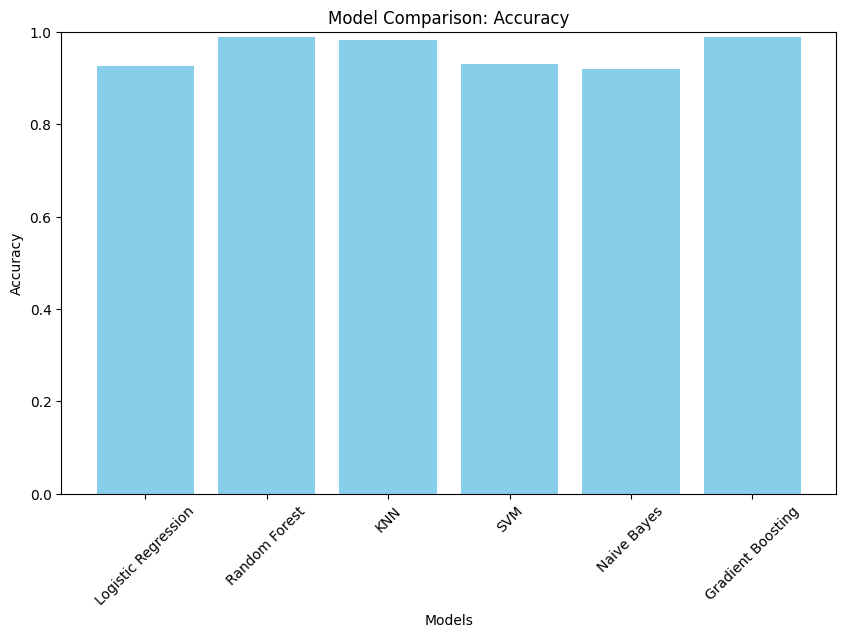


Best Model: Random Forest
Accuracy: 0.9878


In [ ]:
# Store Model Performance
ml_model_results = {
    "Logistic Regression": accuracy_lr,
    "Random Forest": accuracy_rf,
    "KNN": accuracy_knn,
    "SVM": accuracy_svc,
    "Naive Bayes": accuracy_nb,
    "Gradient Boosting": accuracy_gb,
}


ml_model_results["KNN"] = accuracy_knn

# Print Model Performance
print("\nModel Performance Comparison:")
for model, accuracy in ml_model_results.items():
    print(f"{model}: Accuracy = {accuracy:.4f}")

# Generate Comparison Chart
plt.figure(figsize=(10, 6))
plt.bar(ml_model_results.keys(), ml_model_results.values(), color='skyblue')
plt.title("Model Comparison: Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

# Determine Best Model
best_model_name = max(ml_model_results, key=ml_model_results.get)
print(f"\nBest Model: {best_model_name}")
print(f"Accuracy: {ml_model_results[best_model_name]:.4f}")


**CHECK FOR OVERFITTING**

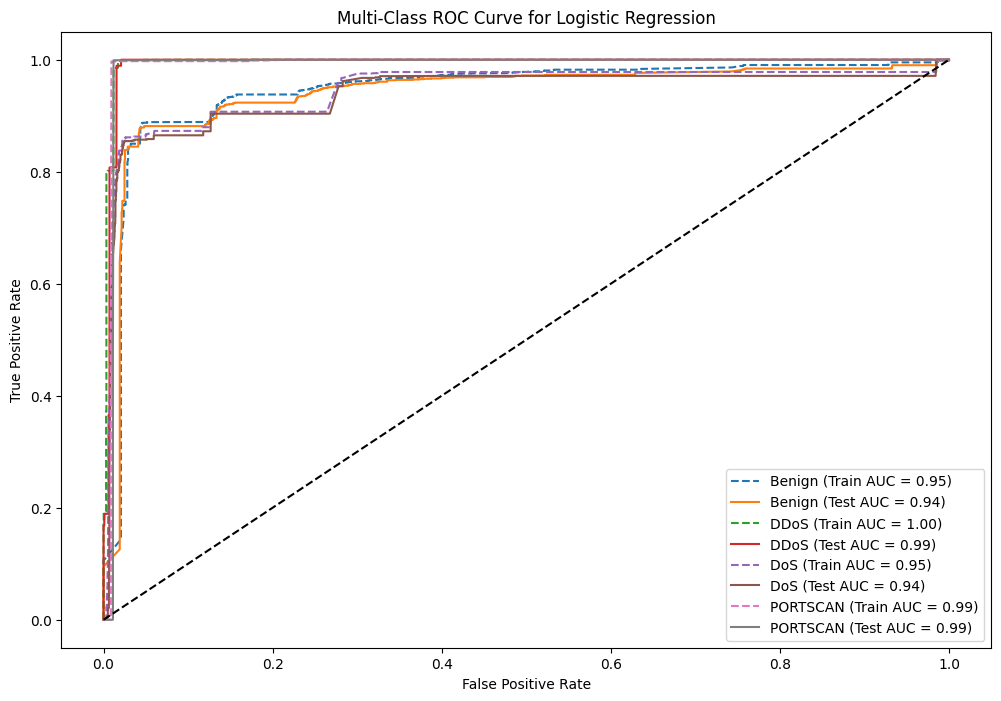

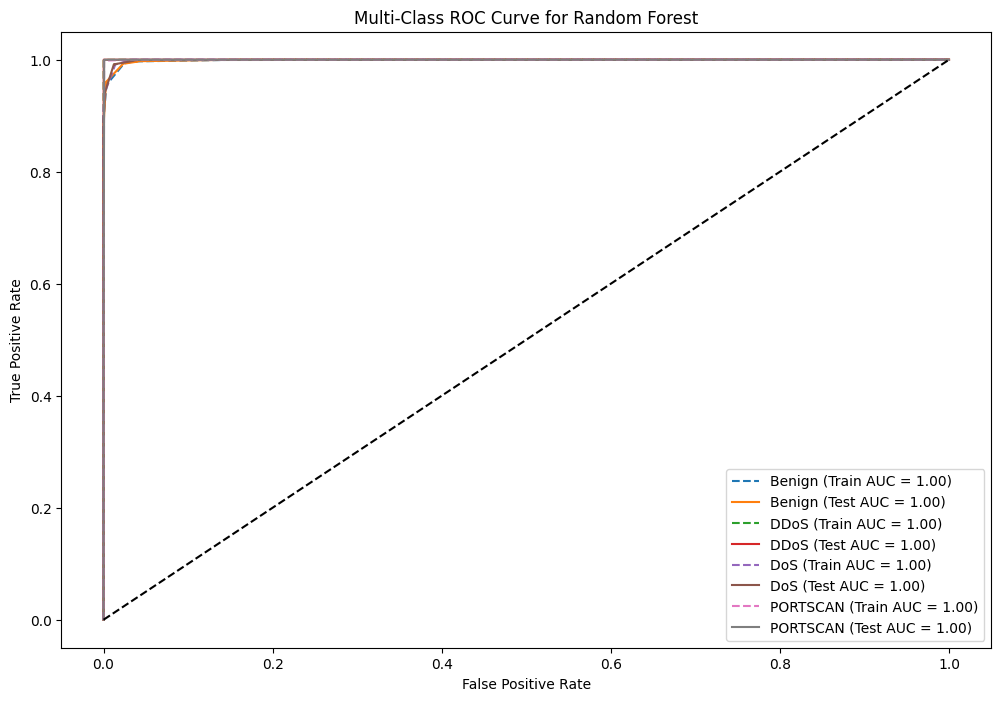

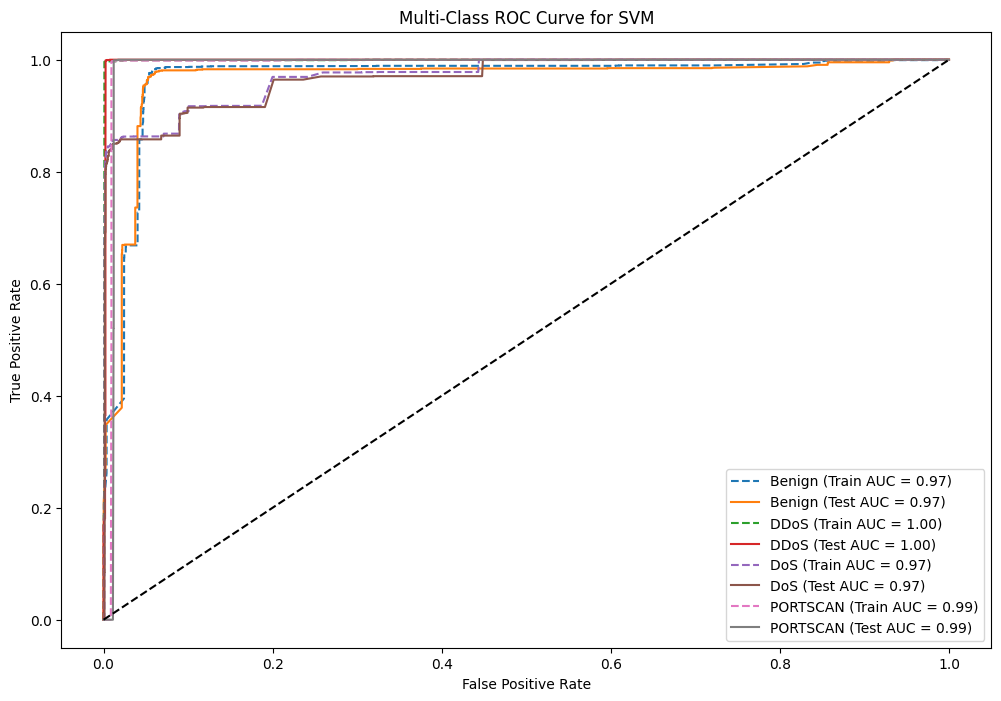

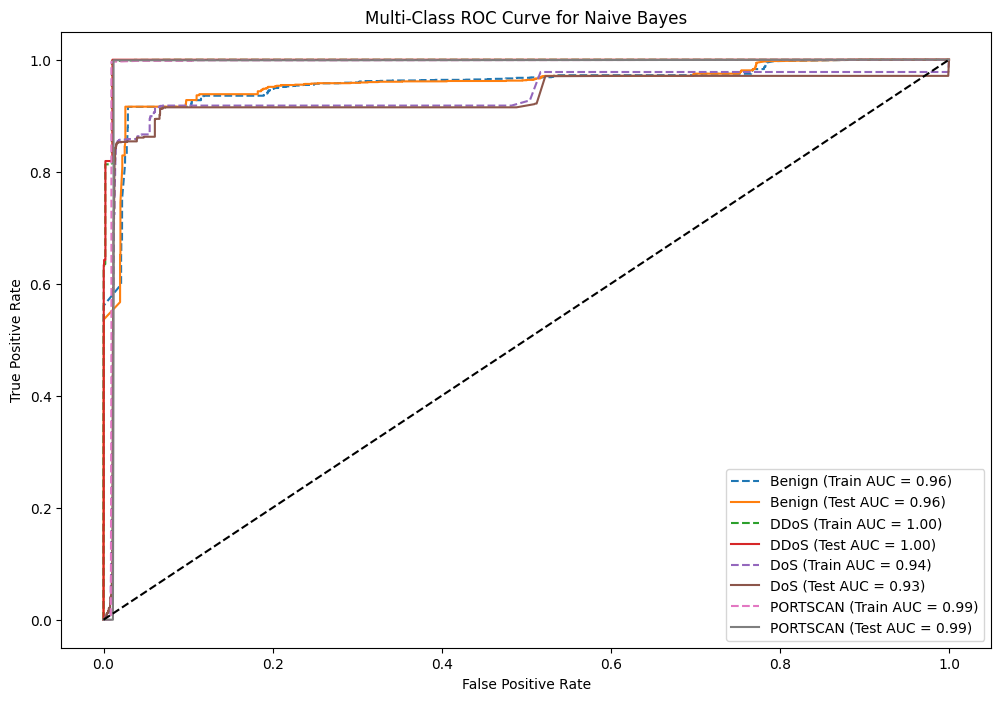

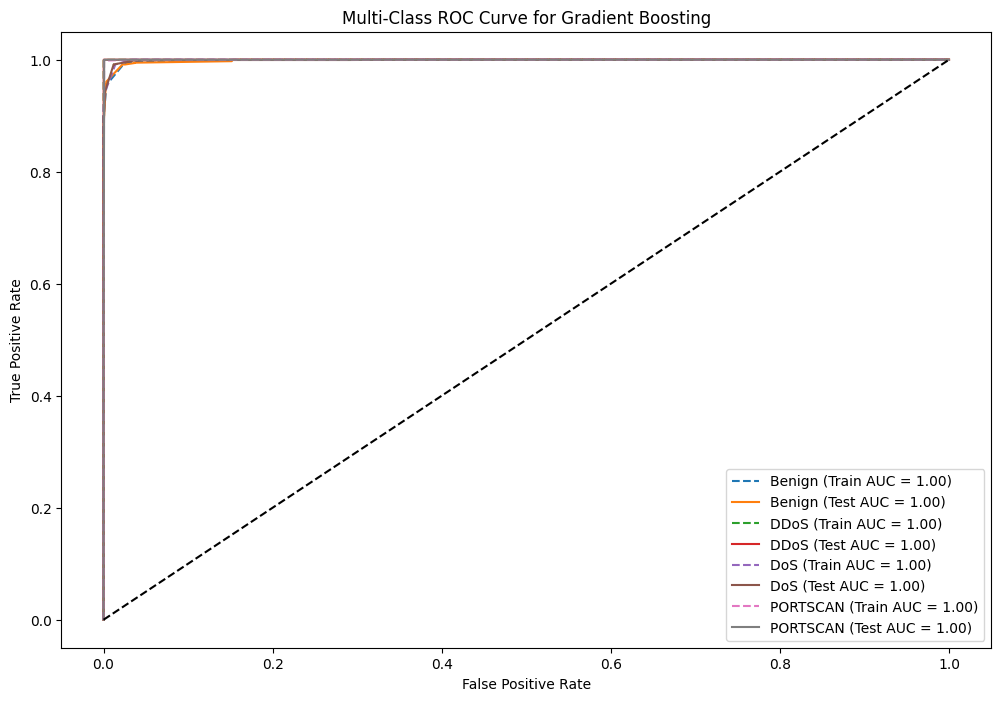

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

def plot_multiclass_roc_auc(model, X_train, X_test, y_train, y_test, class_names, model_name):
    # Binarize the labels for multi-class ROC
    y_train_bin = label_binarize(y_train, classes=range(len(class_names)))
    y_test_bin = label_binarize(y_test, classes=range(len(class_names)))

    n_classes = len(class_names)

    # Compute ROC-AUC for each class
    plt.figure(figsize=(12, 8))

    for i in range(n_classes):
        # Predict probabilities
        y_train_pred_proba = model.predict_proba(X_train)[:, i]
        y_test_pred_proba = model.predict_proba(X_test)[:, i]

        # Compute ROC curve and AUC
        fpr_train, tpr_train, _ = roc_curve(y_train_bin[:, i], y_train_pred_proba)
        fpr_test, tpr_test, _ = roc_curve(y_test_bin[:, i], y_test_pred_proba)

        auc_train = auc(fpr_train, tpr_train)
        auc_test = auc(fpr_test, tpr_test)

        # Plot ROC curves
        plt.plot(fpr_train, tpr_train, linestyle='--', label=f'{class_names[i]} (Train AUC = {auc_train:.2f})')
        plt.plot(fpr_test, tpr_test, label=f'{class_names[i]} (Test AUC = {auc_test:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')  # Random classifier line
    plt.title(f'Multi-Class ROC Curve for {model_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

# Example usage
class_names = ['Benign','DDoS','DoS','PORTSCAN']  # Update with your actual class names

plot_multiclass_roc_auc(lr, X_train, X_test, y_train, y_test, class_names, "Logistic Regression")
plot_multiclass_roc_auc(rf, X_train, X_test, y_train, y_test, class_names, "Random Forest")
plot_multiclass_roc_auc(svc, X_train, X_test, y_train, y_test, class_names,"SVM")
plot_multiclass_roc_auc(nb, X_train, X_test, y_train, y_test, class_names,"Naive Bayes")
plot_multiclass_roc_auc(gb, X_train, X_test, y_train, y_test, class_names, "Gradient Boosting")


**SAVE ML MODELS**

In [ ]:
import joblib
joblib.dump(rf, '/content/rf_model_explainable.pkl')
joblib.dump(lr, '/content/logreg_model_explainable.pkl')
joblib.dump(knn, '/content/knn_model_explainable.pkl')
joblib.dump(svc, '/content/svm_model_explainable.pkl')
joblib.dump(nb, '/content/nb_model_explainable.pkl')
joblib.dump(gb, '/content/gb_model_explainable.pkl')

['/content/gb_model_explainable.pkl']

#DEEP LEARNING



**1-D CNN**

In [ ]:
data.shape

(18535, 5)

**RESHAPING & SCALING**

In [ ]:
# Reshape features for 1D CNN: (samples, timesteps, features)
X_reshaped = X.values.reshape(X.shape[0], X.shape[1], 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.35, random_state=42)

# Print shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (12047, 4, 1)
y_train shape: (12047,)
X_test shape: (6488, 4, 1)
y_test shape: (6488,)


**MODEL DEFINITION**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

model = Sequential()

# Single Conv1D layer with fewer filters
# Updated input_shape to match the actual number of features (5)
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', padding='same', input_shape=(5, 1)))
# Change input_shape to (5, 1)

# MaxPooling layer
model.add(MaxPooling1D(pool_size=2))

# Flatten layer
model.add(Flatten())

# Fully Connected Layer
# Adjusted units to match the output of Flatten with 5 features
model.add(Dense(32, activation='relu'))  # Adjust units as needed

# Output Layer for multi-class classification
model.add(Dense(4, activation='softmax'))  # 4 output nodes for 4 classes

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 5, 32)               │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 2, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,308 (9.02 KB)

 Trainable params: 2,308 (9.02 KB)

 Non-trainable params: 0 (0.00 B)

**MODEL TRAINING**

In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
test_loss, test_accuracy_cnn=model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy_cnn:.4f}")

Epoch 1/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5082 - loss: 1.1429 - val_accuracy: 0.8727 - val_loss: 0.6514
Epoch 2/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8827 - loss: 0.5479 - val_accuracy: 0.9091 - val_loss: 0.3752
Epoch 3/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9115 - loss: 0.3443 - val_accuracy: 0.9172 - val_loss: 0.2857
Epoch 4/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9200 - loss: 0.2725 - val_accuracy: 0.9279 - val_loss: 0.2581
Epoch 5/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9298 - loss: 0.2400 - val_accuracy: 0.9286 - val_loss: 0.2390
Epoch 6/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9292 - loss: 0.2236 - val_accuracy: 0.9305 - val_loss: 0.2330
Epoch 7/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9289 - loss: 0.2160 - val_accuracy: 0.9400 - val_loss: 0.2241
Epoch 8/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9277 - loss: 0.2200 - val_accu

**CHECK FOR OVERFITTING**

377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


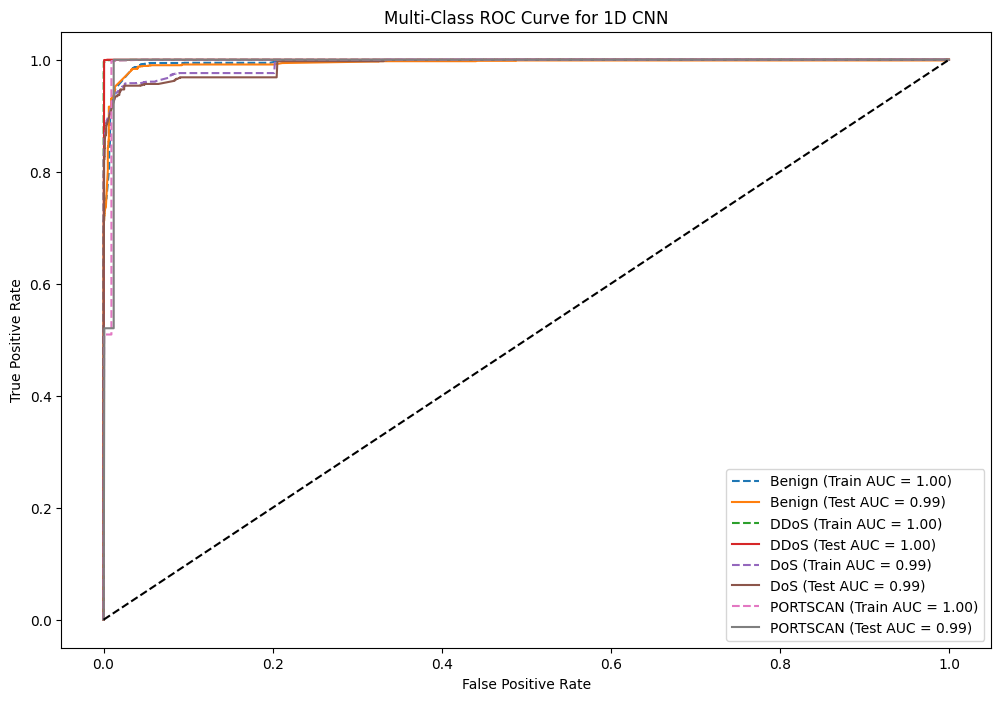

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np

# Use the trained model directly, instead of redefining it
# model = ...  (Remove the model definition here)


class_names = ['Benign', 'DDoS', 'DoS', 'PORTSCAN']  # Update with your actual class names

def plot_roc_auc_cnn(model, X_train, y_train, X_test, y_test, model_name="1D CNN"):
    # Binarize the labels for multi-class ROC
    y_train_bin = label_binarize(y_train, classes=np.unique(y_train))
    y_test_bin = label_binarize(y_test, classes=np.unique(y_train))

    n_classes = y_train_bin.shape[1]

    # Compute ROC-AUC for each class
    plt.figure(figsize=(12, 8))

    for i in range(n_classes):
        # Predict probabilities
        y_train_pred_proba = model.predict(X_train)[:, i]  # Get probabilities for class i
        y_test_pred_proba = model.predict(X_test)[:, i]    # Get probabilities for class i

        # Compute ROC curve and AUC
        fpr_train, tpr_train, _ = roc_curve(y_train_bin[:, i], y_train_pred_proba)
        fpr_test, tpr_test, _ = roc_curve(y_test_bin[:, i], y_test_pred_proba)

        auc_train = auc(fpr_train, tpr_train)
        auc_test = auc(fpr_test, tpr_test)

        # Use class names instead of indices
        class_label = class_names[i] if i < len(class_names) else f"Class {i}"
        plt.plot(fpr_train, tpr_train, linestyle='--', label=f'{class_label} (Train AUC = {auc_train:.2f})')
        plt.plot(fpr_test, tpr_test, label=f'{class_label} (Test AUC = {auc_test:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')  # Random classifier line
    plt.title(f'Multi-Class ROC Curve for {model_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

# Example usage
plot_roc_auc_cnn(model, X_train, y_train, X_test, y_test, "1D CNN") # Use the trained 'model'

**LSTM**



**RESHAPING & SCALING**

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np

# Scale the features (if not done already)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X is your feature matrix

# Train-test split with stratification for balanced multi-class labels
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.35, random_state=42, stratify=y)

# Convert labels to one-hot encoding for multi-class classification
num_classes = len(np.unique(y))  # Number of unique classes
y_train_onehot = to_categorical(y_train, num_classes=num_classes)
y_test_onehot = to_categorical(y_test, num_classes=num_classes)

# Print shapes
print("X_train shape:", X_train.shape)  # (samples_train, features)
print("y_train shape (one-hot):", y_train_onehot.shape)  # (samples_train, num_classes)
print("X_test shape:", X_test.shape)  # (samples_test, features)
print("y_test shape (one-hot):", y_test_onehot.shape)  # (samples_test, num_classes)


X_train shape: (12047, 4)
y_train shape (one-hot): (12047, 4)
X_test shape: (6488, 4)
y_test shape (one-hot): (6488, 4)


**MODEL DEFINITION**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, LeakyReLU
from tensorflow.keras.optimizers import Adam
import numpy as np

# Reshape X_train to include a time step dimension
# Assuming each sample has 1 time step
X_train_reshaped = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])

# Define LSTM Model
lstm_model = Sequential()

# Add LSTM layer with the reshaped input shape
lstm_model.add(LSTM(50, activation='tanh', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))

# Add Dropout layer to prevent overfitting
lstm_model.add(Dropout(0.2))

# Add Fully Connected layer
lstm_model.add(Dense(64, activation=None))  # Set activation to None initially
lstm_model.add(LeakyReLU(alpha=0.01))  # Apply Leaky ReLU with alpha=0.01

# Add Output layer for multi-class classification
# Adjust the number of units to match the number of classes
num_classes = y_train_onehot.shape[1]  # Number of unique classes
lstm_model.add(Dense(num_classes, activation='softmax'))

# Compile the model
lstm_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',  # Use categorical_crossentropy for multi-class classification
    metrics=['accuracy']
)

# Model summary
lstm_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50)                  │          11,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           3,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,524 (56.73 KB)

 Trainable params: 14,524 (56.73 KB)

 Non-trainable params: 0 (0.00 B)

**MODEL TRAINING**

In [ ]:
# ipython-input-387-a3d9aee0f9ba

# Assuming X_train_reshaped is already defined as in ipython-input-386-a3d9aee0f9ba

# Train the LSTM model
history = lstm_model.fit( # Changed model to lstm_model
    X_train_reshaped, # Changed X_train to X_train_reshaped
    y_train_onehot,  # Use one-hot encoded labels for multi-class classification
    epochs=100,
    batch_size=32,
    validation_data=(X_test.reshape(X_test.shape[0], 1, X_test.shape[1]), y_test_onehot) # Reshape X_test and use one-hot encoded labels
)

# Evaluate the LSTM model on the test set
test_loss, test_accuracy_lstm = lstm_model.evaluate(X_test.reshape(X_test.shape[0], 1, X_test.shape[1]), y_test_onehot) # Reshape X_test and use one-hot encoded labels
print(f"Test Accuracy: {test_accuracy_lstm:.4f}")

Epoch 1/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8717 - loss: 0.7612 - val_accuracy: 0.9091 - val_loss: 0.2279
Epoch 2/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9243 - loss: 0.2155 - val_accuracy: 0.9462 - val_loss: 0.1683
Epoch 3/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9415 - loss: 0.1777 - val_accuracy: 0.9595 - val_loss: 0.1424
Epoch 4/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9514 - loss: 0.1524 - val_accuracy: 0.9602 - val_loss: 0.1262
Epoch 5/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9579 - loss: 0.1353 - val_accuracy: 0.9604 - val_loss: 0.1167
Epoch 6/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9607 - loss: 0.1207 - val_accuracy: 0.9613 - val_loss: 0.1113
Epoch 7/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9578 - loss: 0.1223 - val_accuracy: 0.9615 - val_loss: 0.1054
Epoch 8/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9606 - loss: 0.1111 - val_accu

**CHECK FOR OVERFITTING**

377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


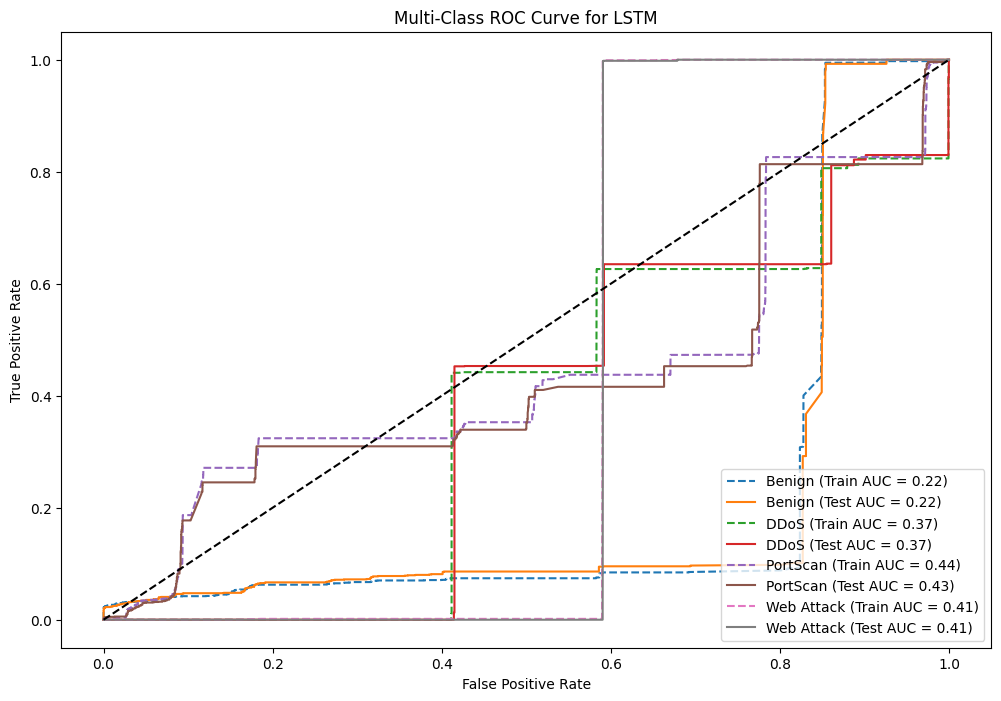

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np

# Reshape X_train and X_test to include a time step dimension
# Assuming each sample has 1 time step
X_train_reshaped = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_reshaped = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define the LSTM Model
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), activation='relu'))
lstm_model.add(Dense(64, activation='relu'))
# Output layer for multi-class classification
lstm_model.add(Dense(4, activation='softmax'))  # Assuming 4 classes

# Compile the model
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Class names corresponding to multi-class labels
class_names = ['Benign', 'DDoS', 'PortScan', 'Web Attack']

def plot_roc_auc_lstm(model, X_train, y_train, X_test, y_test, class_names, model_name="LSTM"):
    # Binarize the labels for multi-class ROC
    y_train_bin = label_binarize(y_train, classes=np.unique(y_train))
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

    n_classes = y_train_bin.shape[1]

    # Compute ROC-AUC for each class
    plt.figure(figsize=(12, 8))

    for i in range(n_classes):
        # Predict probabilities
        y_train_pred_proba = model.predict(X_train)[:, i]  # Get probabilities for class i
        y_test_pred_proba = model.predict(X_test)[:, i]    # Get probabilities for class i

        # Compute ROC curve and AUC
        fpr_train, tpr_train, _ = roc_curve(y_train_bin[:, i], y_train_pred_proba)
        fpr_test, tpr_test, _ = roc_curve(y_test_bin[:, i], y_test_pred_proba)

        auc_train = auc(fpr_train, tpr_train)
        auc_test = auc(fpr_test, tpr_test)

        # Use class names instead of indices
        class_label = class_names[i] if i < len(class_names) else f"Class {i}"
        plt.plot(fpr_train, tpr_train, linestyle='--', label=f'{class_label} (Train AUC = {auc_train:.2f})')
        plt.plot(fpr_test, tpr_test, label=f'{class_label} (Test AUC = {auc_test:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')  # Random classifier line
    plt.title(f'Multi-Class ROC Curve for {model_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

# Example usage with reshaped data
plot_roc_auc_lstm(lstm_model, X_train_reshaped, y_train, X_test_reshaped, y_test, class_names, "LSTM")

**ANN**

**RESHAPING & SCALING**


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.35, random_state=42, stratify=y)

# Print shapes
print("X_train shape:", X_train.shape)  # (samples_train, features)
print("y_train shape:", y_train.shape)  # (samples_train,)
print("X_test shape:", X_test.shape)    # (samples_test, features)
print("y_test shape:", y_test.shape)    # (samples_test,)


X_train shape: (12047, 4)
y_train shape: (12047,)
X_test shape: (6488, 4)
y_test shape: (6488,)


**MODEL DEFINTIION**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2  # Import l2 from keras.regularizers

# Define the ANN Model
ann_model = Sequential()

# Input Layer
ann_model.add(Dense(256, input_dim=X_train.shape[1], activation=None))
ann_model.add(BatchNormalization())
ann_model.add(LeakyReLU(alpha=0.01))

# Hidden Layers
ann_model.add(Dense(128, activation=None, kernel_regularizer=l2(0.01)))  # Use l2 as a function
ann_model.add(BatchNormalization())
ann_model.add(LeakyReLU(alpha=0.01))
ann_model.add(Dropout(0.3))

ann_model.add(Dense(64, activation='relu'))
ann_model.add(Dropout(0.2))

# Output Layer
ann_model.add(Dense(4, activation='softmax'))  # Multi-class classification

# Compile the model
ann_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


**MODEL TRAINING**

In [ ]:
# Train the model
history = ann_model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
)

# Evaluate the model
test_loss, test_accuracy_ann = ann_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy_ann:.4f}")


Epoch 1/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8847 - loss: 1.4291 - val_accuracy: 0.9465 - val_loss: 0.3353
Epoch 2/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9405 - loss: 0.3113 - val_accuracy: 0.9393 - val_loss: 0.2131
Epoch 3/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9472 - loss: 0.2257 - val_accuracy: 0.9622 - val_loss: 0.1690
Epoch 4/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9509 - loss: 0.2023 - val_accuracy: 0.9558 - val_loss: 0.1618
Epoch 5/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9449 - loss: 0.2124 - val_accuracy: 0.9612 - val_loss: 0.1531
Epoch 6/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9521 - loss: 0.1913 - val_accuracy: 0.9642 - val_loss: 0.1600
Epoch 7/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9525 - loss: 0.1851 - val_accuracy: 0.9585 - val_loss: 0.1585
Epoch 8/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9517 - loss: 0.1793 - val_accu

**DL MODEL COMPARISON**


Deep Learning Model Performance Comparison:
1D CNN: Accuracy = 0.9609
LSTM: Accuracy = 0.9718
ANN: Accuracy = 0.9658


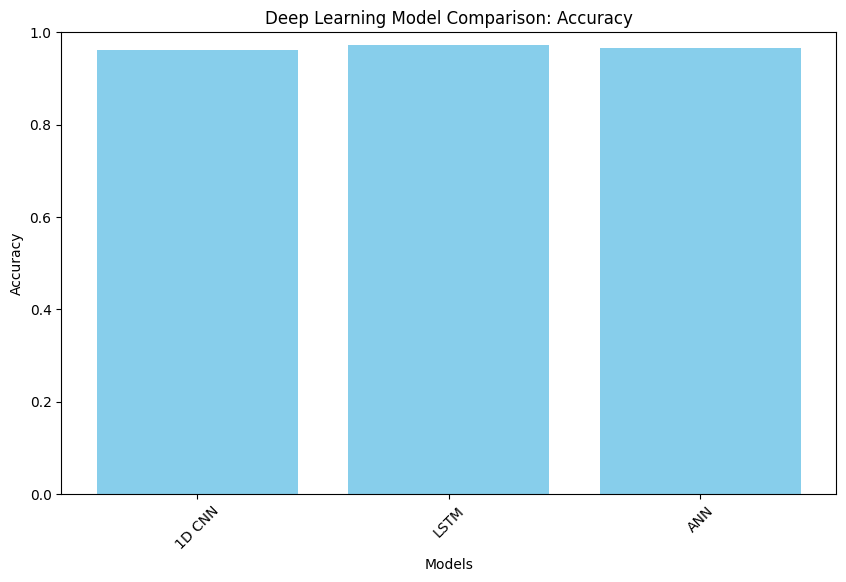


Best Deep Learning Model: LSTM
Accuracy: 0.9718


In [ ]:
# Store Deep Learning Model Performance
dl_model_results = {
    "1D CNN": test_accuracy_cnn,        # Replace with actual 1D CNN test accuracy
    "LSTM": test_accuracy_lstm,        # Replace with actual LSTM test accuracy
    "ANN": test_accuracy_ann        # Replace with actual ANN test accuracy
}

# Print Model Performance
print("\nDeep Learning Model Performance Comparison:")
for model, accuracy in dl_model_results.items():
    print(f"{model}: Accuracy = {accuracy:.4f}")

# Generate Comparison Chart
plt.figure(figsize=(10, 6))
plt.bar(dl_model_results.keys(), dl_model_results.values(), color='skyblue')
plt.title("Deep Learning Model Comparison: Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

# Determine Best Model
best_dl_model_name = max(dl_model_results, key=dl_model_results.get)
print(f"\nBest Deep Learning Model: {best_dl_model_name}")
print(f"Accuracy: {dl_model_results[best_dl_model_name]:.4f}")


In [ ]:
# Before the model.save line, add:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

model = Sequential()

model.add(Conv1D(filters=32, kernel_size=2, activation='relu', padding='same', input_shape=(9, 1)))

model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())

model.add(Dense(288, activation='relu'))

model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# This redefines 'model' as the intended Keras model
ann_model.save('/content/drive/MyDrive/ann_model_explainable.h5')
lstm_model.save('/content/drive/MyDrive/lstm_model_explainable.h5')
model.save('/content/drive/MyDrive/cnn_model_explainable.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
